In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Load the dataset

In [5]:
data = pd.read_csv("Customer-Churn.csv")

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


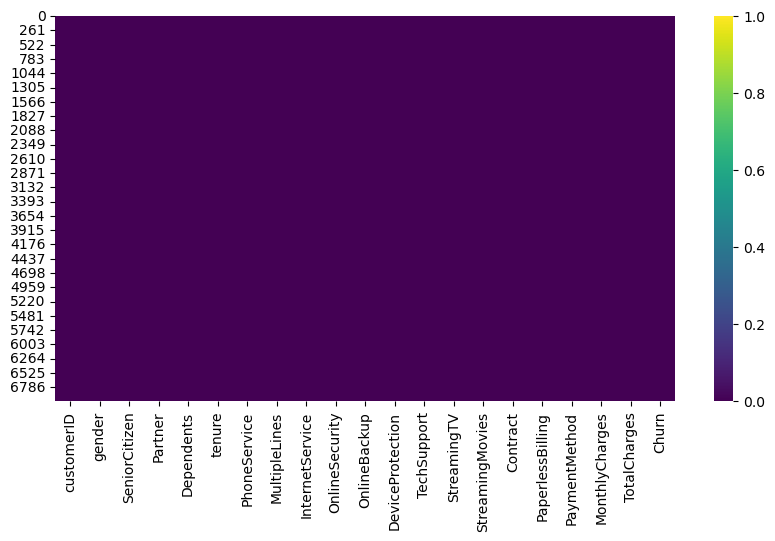

In [10]:
## visualizing missing data
plt.figure(figsize  =(10,5))
sns.heatmap(data = data.isnull(), cmap = "viridis", vmin = 0, vmax =1);

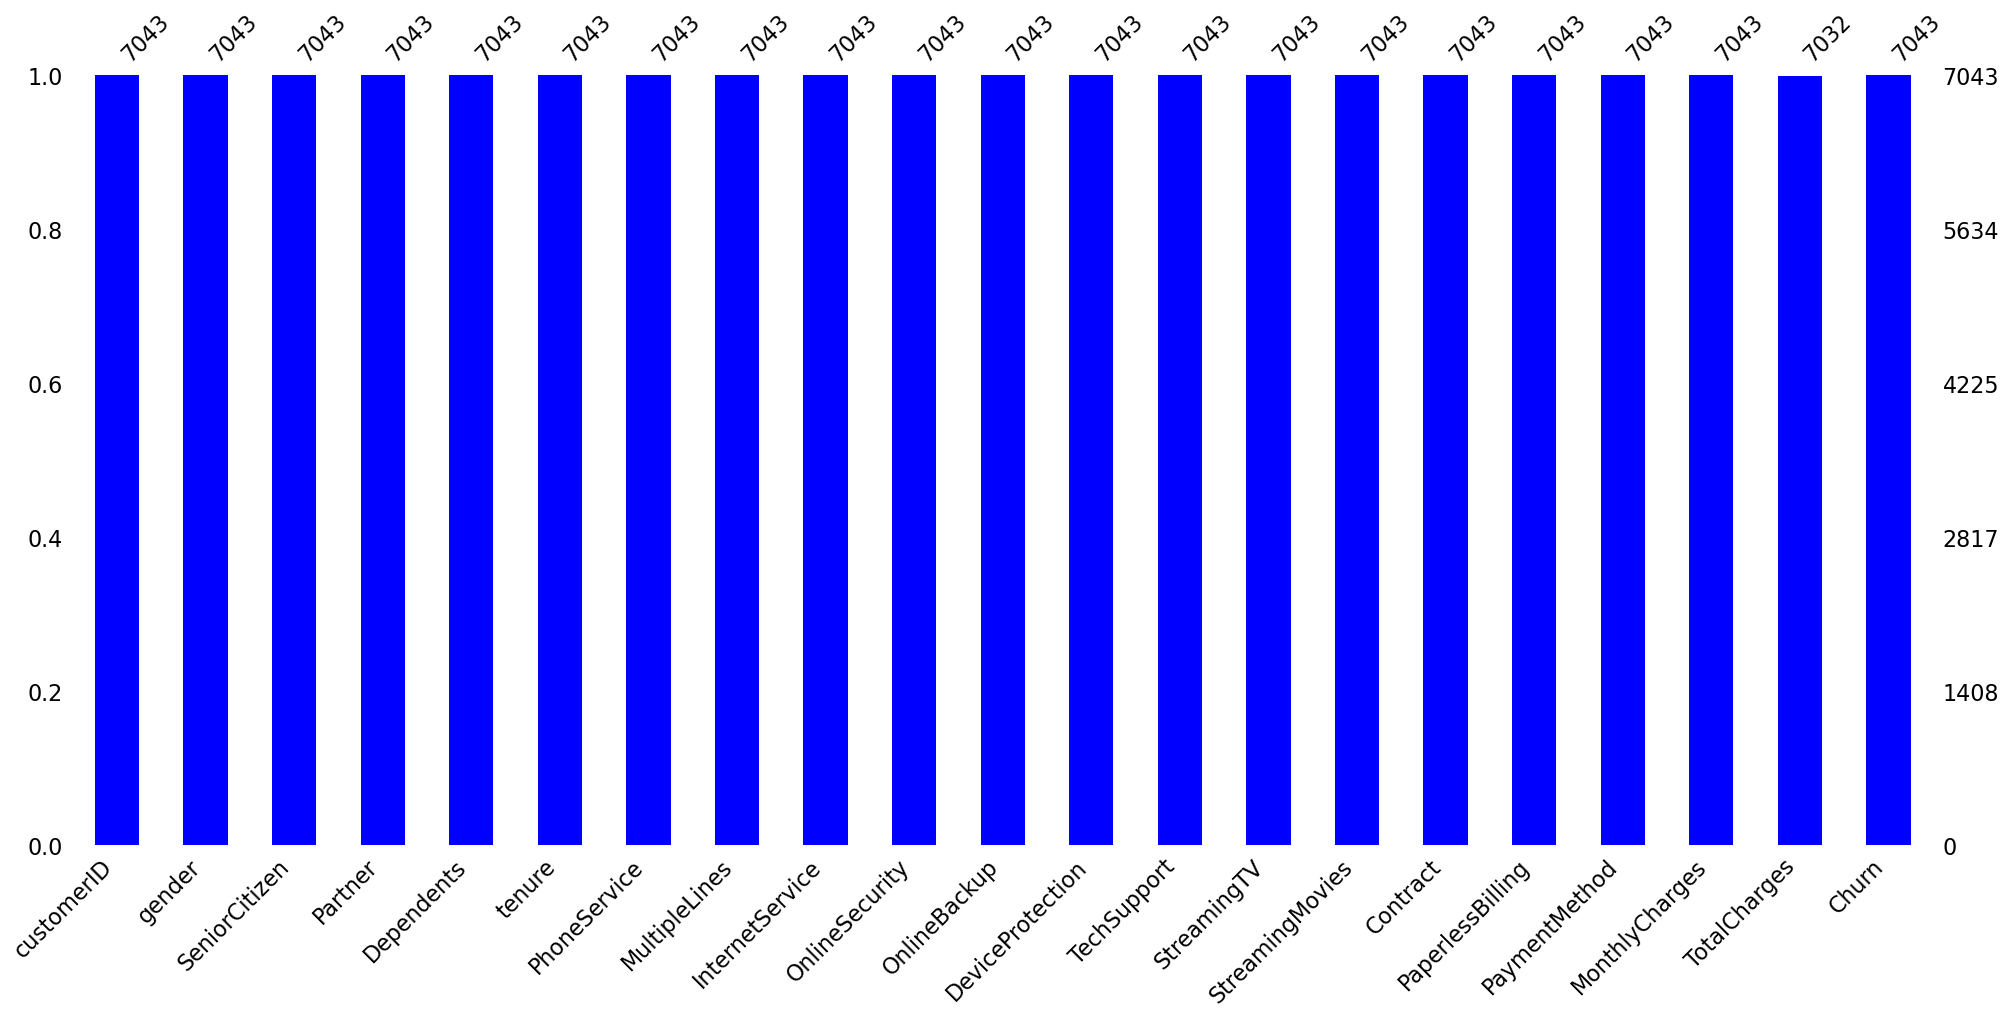

In [14]:
msno.bar(data, color="blue");

##### There are missing data on the Total charges feature/column

In [17]:
#visualisng where we have the missing data on the data set
data[data.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [4]:
#fixing the missing data for the the total charges column
data["TotalCharges"].median()

1397.475

In [5]:
TotalCharges_median = data["TotalCharges"].median()
TotalCharges_median

1397.475

In [17]:
data["TotalCharges"].fillna(TotalCharges_median,inplace=True)

In [18]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
# drop irrelevant columns

data = data.drop(["customerID"], axis =1)

In [25]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Numerical data

In [10]:
numerical_df = data.select_dtypes(exclude = "object")

In [27]:
numerical_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


## **Univariate Analysis**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


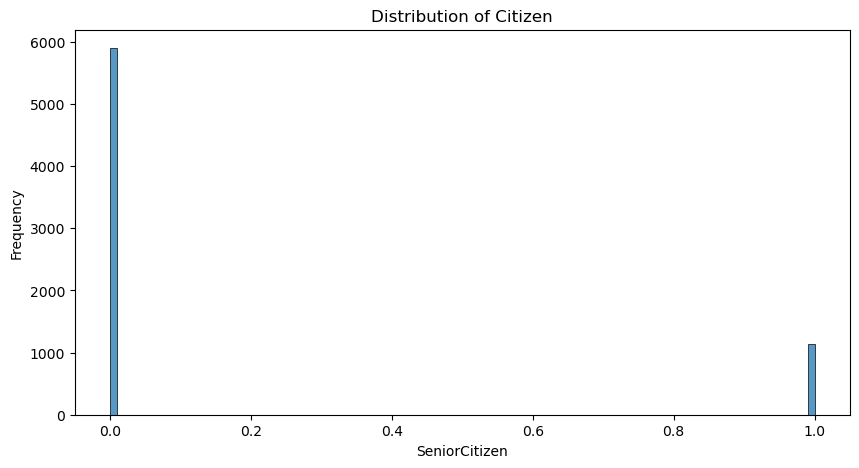

In [28]:
plt.figure(figsize = (10 ,5 ))
sns.histplot(data = data["SeniorCitizen"], bins = 100)
plt.title("Distribution of Citizen")
plt.ylabel("Frequency")
plt.show()

### **Narration about Observation**

##### **Distribution Insights:**
- **Non-Senior Citizens (0.0):** The frequency of non-senior citizens is extremely high, with the bar approaching 6000. This indicates that most data points represent individuals who are not senior citizens.
- **Senior Citizens (1.0):** There is a significantly lower frequency for senior citizens, with the bar around 1000. This suggests that a much smaller portion of the dataset consists of senior citizens.

##### **Overall Interpretation:**
The data is heavily skewed towards non-senior citizens, meaning that the majority of the population in this dataset is not classified as 
senior citizens. This skewness might suggest that any analysis or modeling done on this dataset needs to account for this imbalance, as the characteristics and behaviour of non-senior citizens will dominate the results.


Text(0.5, 0, 'SeniorCitizen')

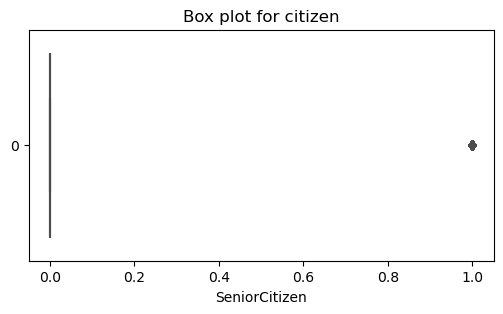

In [7]:
plt.figure(figsize = (6,3))
sns.boxplot(data = data["SeniorCitizen"], orient = 'h', color = "orange")
plt.title("Box plot for citizen")
plt.xlabel("SeniorCitizen")

#### **Distribution of Numerical features**

In [11]:
 numerical_df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [14]:
numerical_cols = numerical_df.columns.to_list()
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

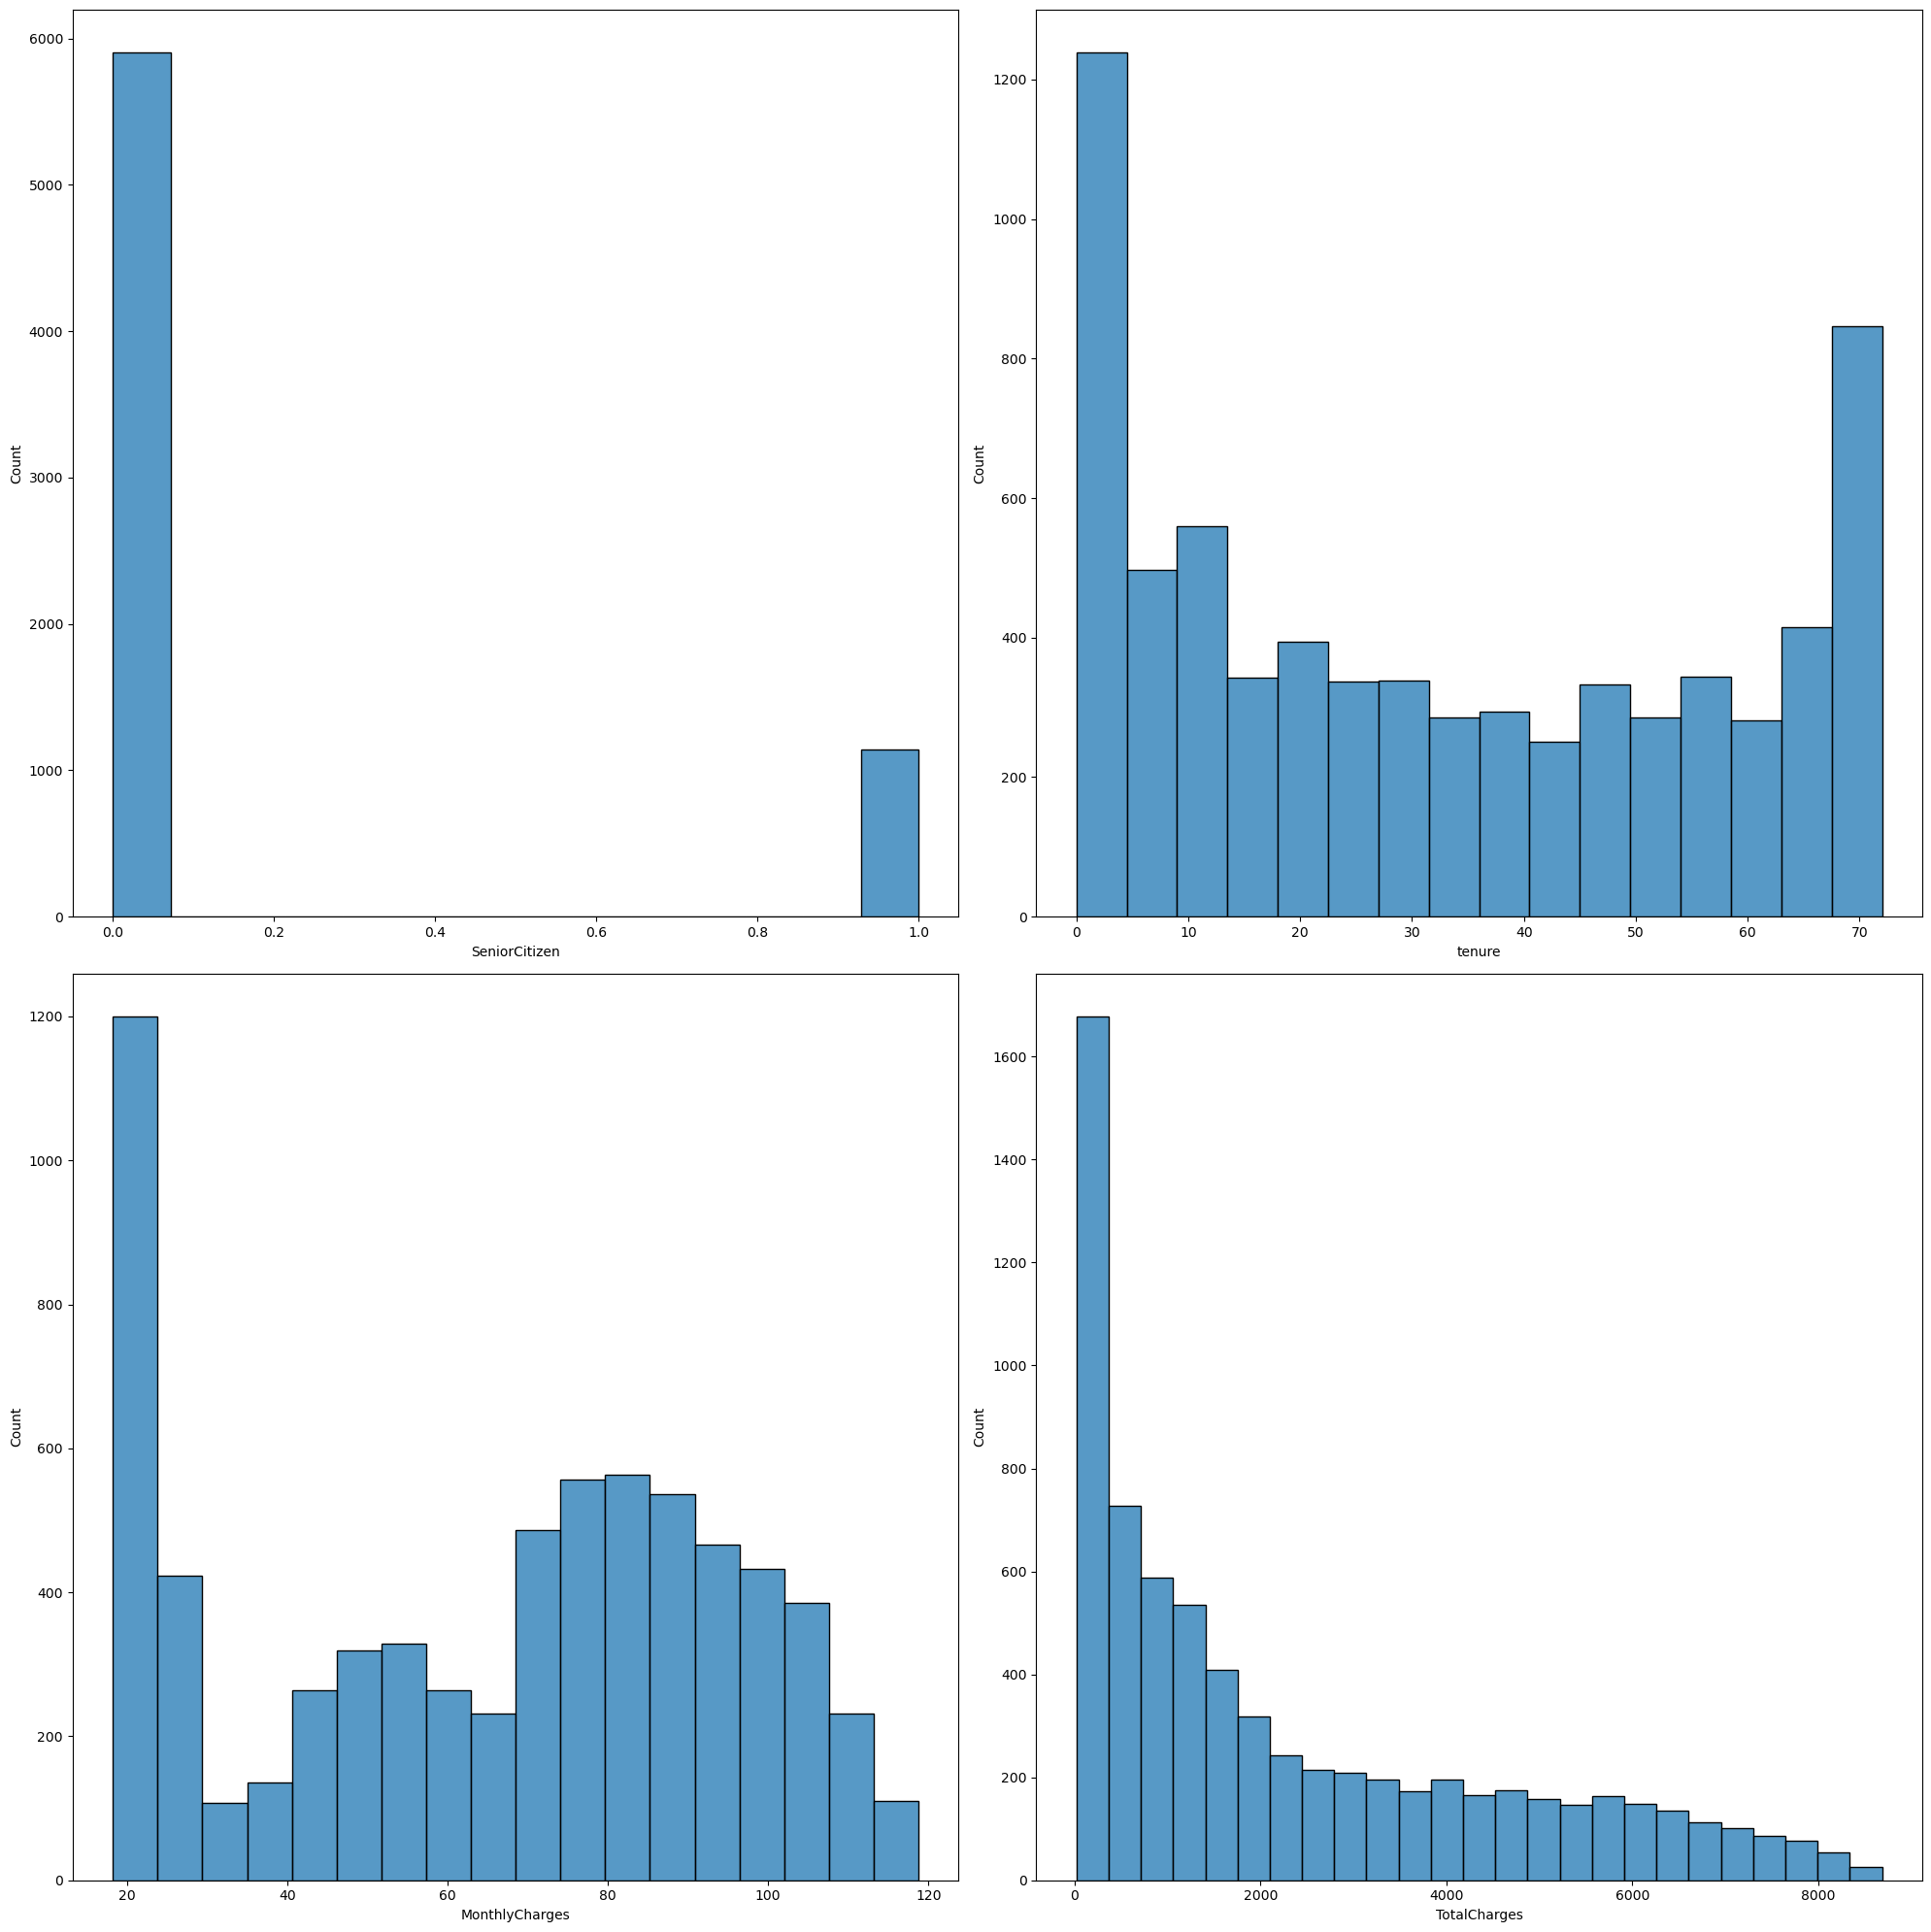

In [15]:
n_features  =len(numerical_cols)
num_cols = 2
num_rows = (n_features + 1)//num_cols

fig, axes = plt.subplots(ncols= num_cols, nrows = num_rows, figsize = (20,20))

position  = axes.flatten()

for index, name_of_feature in enumerate(numerical_cols):
    sns.histplot(data = data[name_of_feature], ax = position[index])
    
plt.tight_layout()

### **Narration about Observation**

#### **Tenure Distribution Chart**
##### **Distribution Insights:**
- **High Frequency at 0 Months:** A significant number of customers have a tenure of 0 months. This likely indicates new customers who have just started their subscription.
- **Decreasing Pattern and Steady Distribution:** After the initial peak at 0 months, there is a sharp decline in customer counts for tenures up to around 10 months. This may suggest a higher churn rate during the early months.
- **Middle Tenure Stability:** There is a relatively stable distribution of customers with tenures between 10 to 60 months, with no dramatic peaks or drops.
- **Increase at 70+ Months:** There is another peak in customer counts at around 70 months, indicating a group of long-term, loyal customers.

##### **Overall Interpretation:**
- **Churn Insights:** The sharp decline after the 0-month tenure might indicate that a significant portion of customers are at risk of churn in the early stages of their subscription. This suggests that the first few months are crucial for customer retention.
- **Loyal Customers:** The increase in frequency at 70+ months suggests that customers who stay past a certain threshold tend to remain loyal for a longer period.
- **Business Implication:** The company might need to focus on strategies to retain customers during the first few months, possibly through targeted promotions, customer engagement, or improved service offerings to reduce early churn. The presence of a loyal customer base at longer tenures suggests that these customers could be leveraged for referrals or upselling opportunities.   

#### **MonthlyCharges Distribution Chart**
##### **Distribution Insights:**
- **High Concentration at Low Charges:** There is a significant spike at the lower end of the MonthlyCharges scale, indicating a large number of customers with low monthly charges.
- **Multimodal Distribution:** The histogram displays several peaks and troughs, suggesting common price points or tiers at which customers are charged.
- **Churn Behavior Insight:** Understanding this distribution can help identify if higher monthly charges correlate with higher churn rates. For instance, if customers with higher charges are more likely to churn, it might indicate a need for better value propositions or customer support for those tiers.

##### **Peak and Trough breakdown:**
##### **Peaks:**
- **Low Monthly Charges:** The first significant peak is at the lower end of the MonthlyCharges scale. This suggests a large number of customers are opting for lower-priced plans.
- **Mid-Range Charges:** There are additional peaks at mid-range price points. These could represent popular pricing tiers where customers find a balance between cost and the services they receive.
- **High-End Charges:** There might be smaller peaks at higher price points, indicating a niche group of customers willing to pay more for premium services.

##### **Troughs:**
- **Between Peaks:** The troughs between the peaks suggest fewer customers are choosing plans that fall between these popular price points. This could be due to a lack of perceived value or fewer offerings in these ranges.
- **High Monthly Charges:** A noticeable drop-off at the higher end of the MonthlyCharges scale indicates fewer customers are willing to pay the highest prices, possibly due to budget constraints or perceived lack of additional value.

## **Bivariate Analysis**

In [18]:
numerical_df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


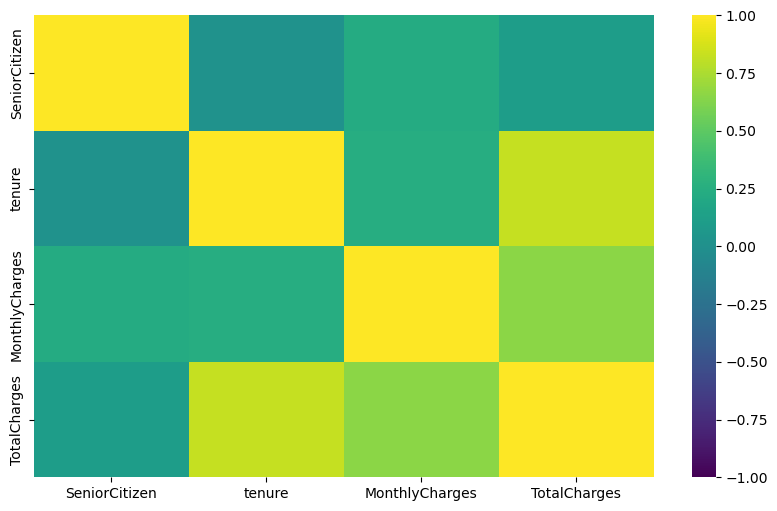

In [19]:
plt.figure(figsize = (10,6))
sns.heatmap(data = numerical_df.corr(), cmap = "viridis", vmin = -1, vmax = 1 );

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

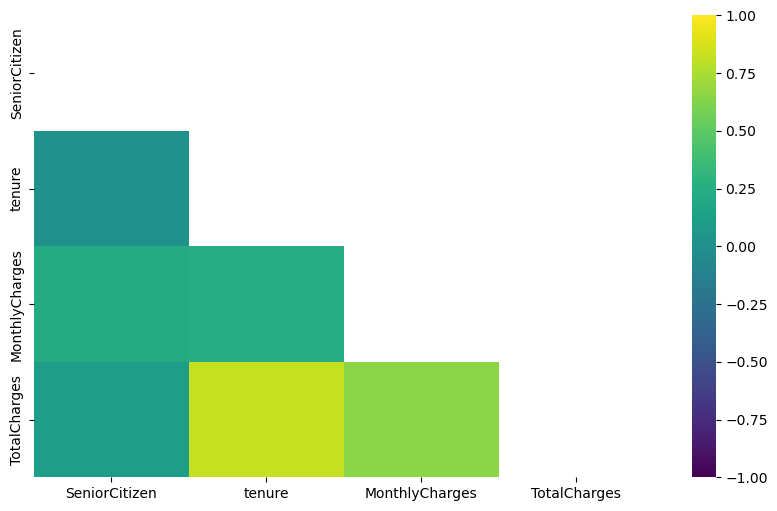

In [20]:
df_mask = np.triu(np.ones_like(numerical_df.corr(), dtype = bool))

plt.figure(figsize = (10,6))
sns.heatmap(data = numerical_df.corr(), cmap = "viridis", vmin = -1, vmax = 1, fmt = ".2f", annot = True, mask = df_mask )

# Categorical data

In [26]:
categorical_df = data.select_dtypes(include = "object")
categorical_df.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


In [28]:
categorical_df.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [31]:
cat_columns = categorical_df.columns.to_list()
cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [32]:
for feature in cat_columns:
    print(f"{feature} -----------> {data[feature].nunique()}")

gender -----------> 2
Partner -----------> 2
Dependents -----------> 2
PhoneService -----------> 2
MultipleLines -----------> 3
InternetService -----------> 3
OnlineSecurity -----------> 3
OnlineBackup -----------> 3
DeviceProtection -----------> 3
TechSupport -----------> 3
StreamingTV -----------> 3
StreamingMovies -----------> 3
Contract -----------> 3
PaperlessBilling -----------> 2
PaymentMethod -----------> 4
Churn -----------> 2


## **Univariate Analysis**

In [34]:
gender_count = data["gender"].value_counts()
gender_count

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [35]:
gender_count.index

Index(['Male', 'Female'], dtype='object', name='gender')

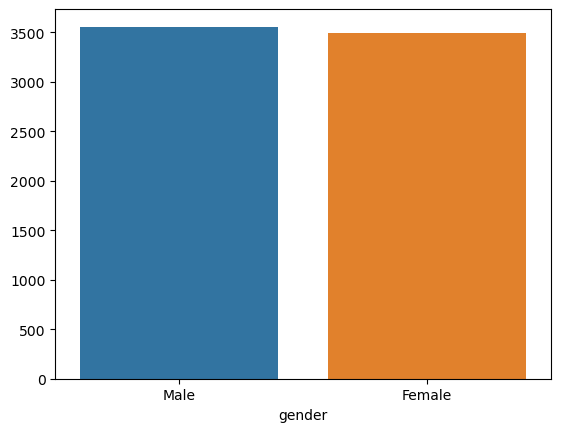

In [37]:
sns.barplot(x = gender_count.index , y = gender_count.values);

In [38]:
categorical_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [61]:
cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

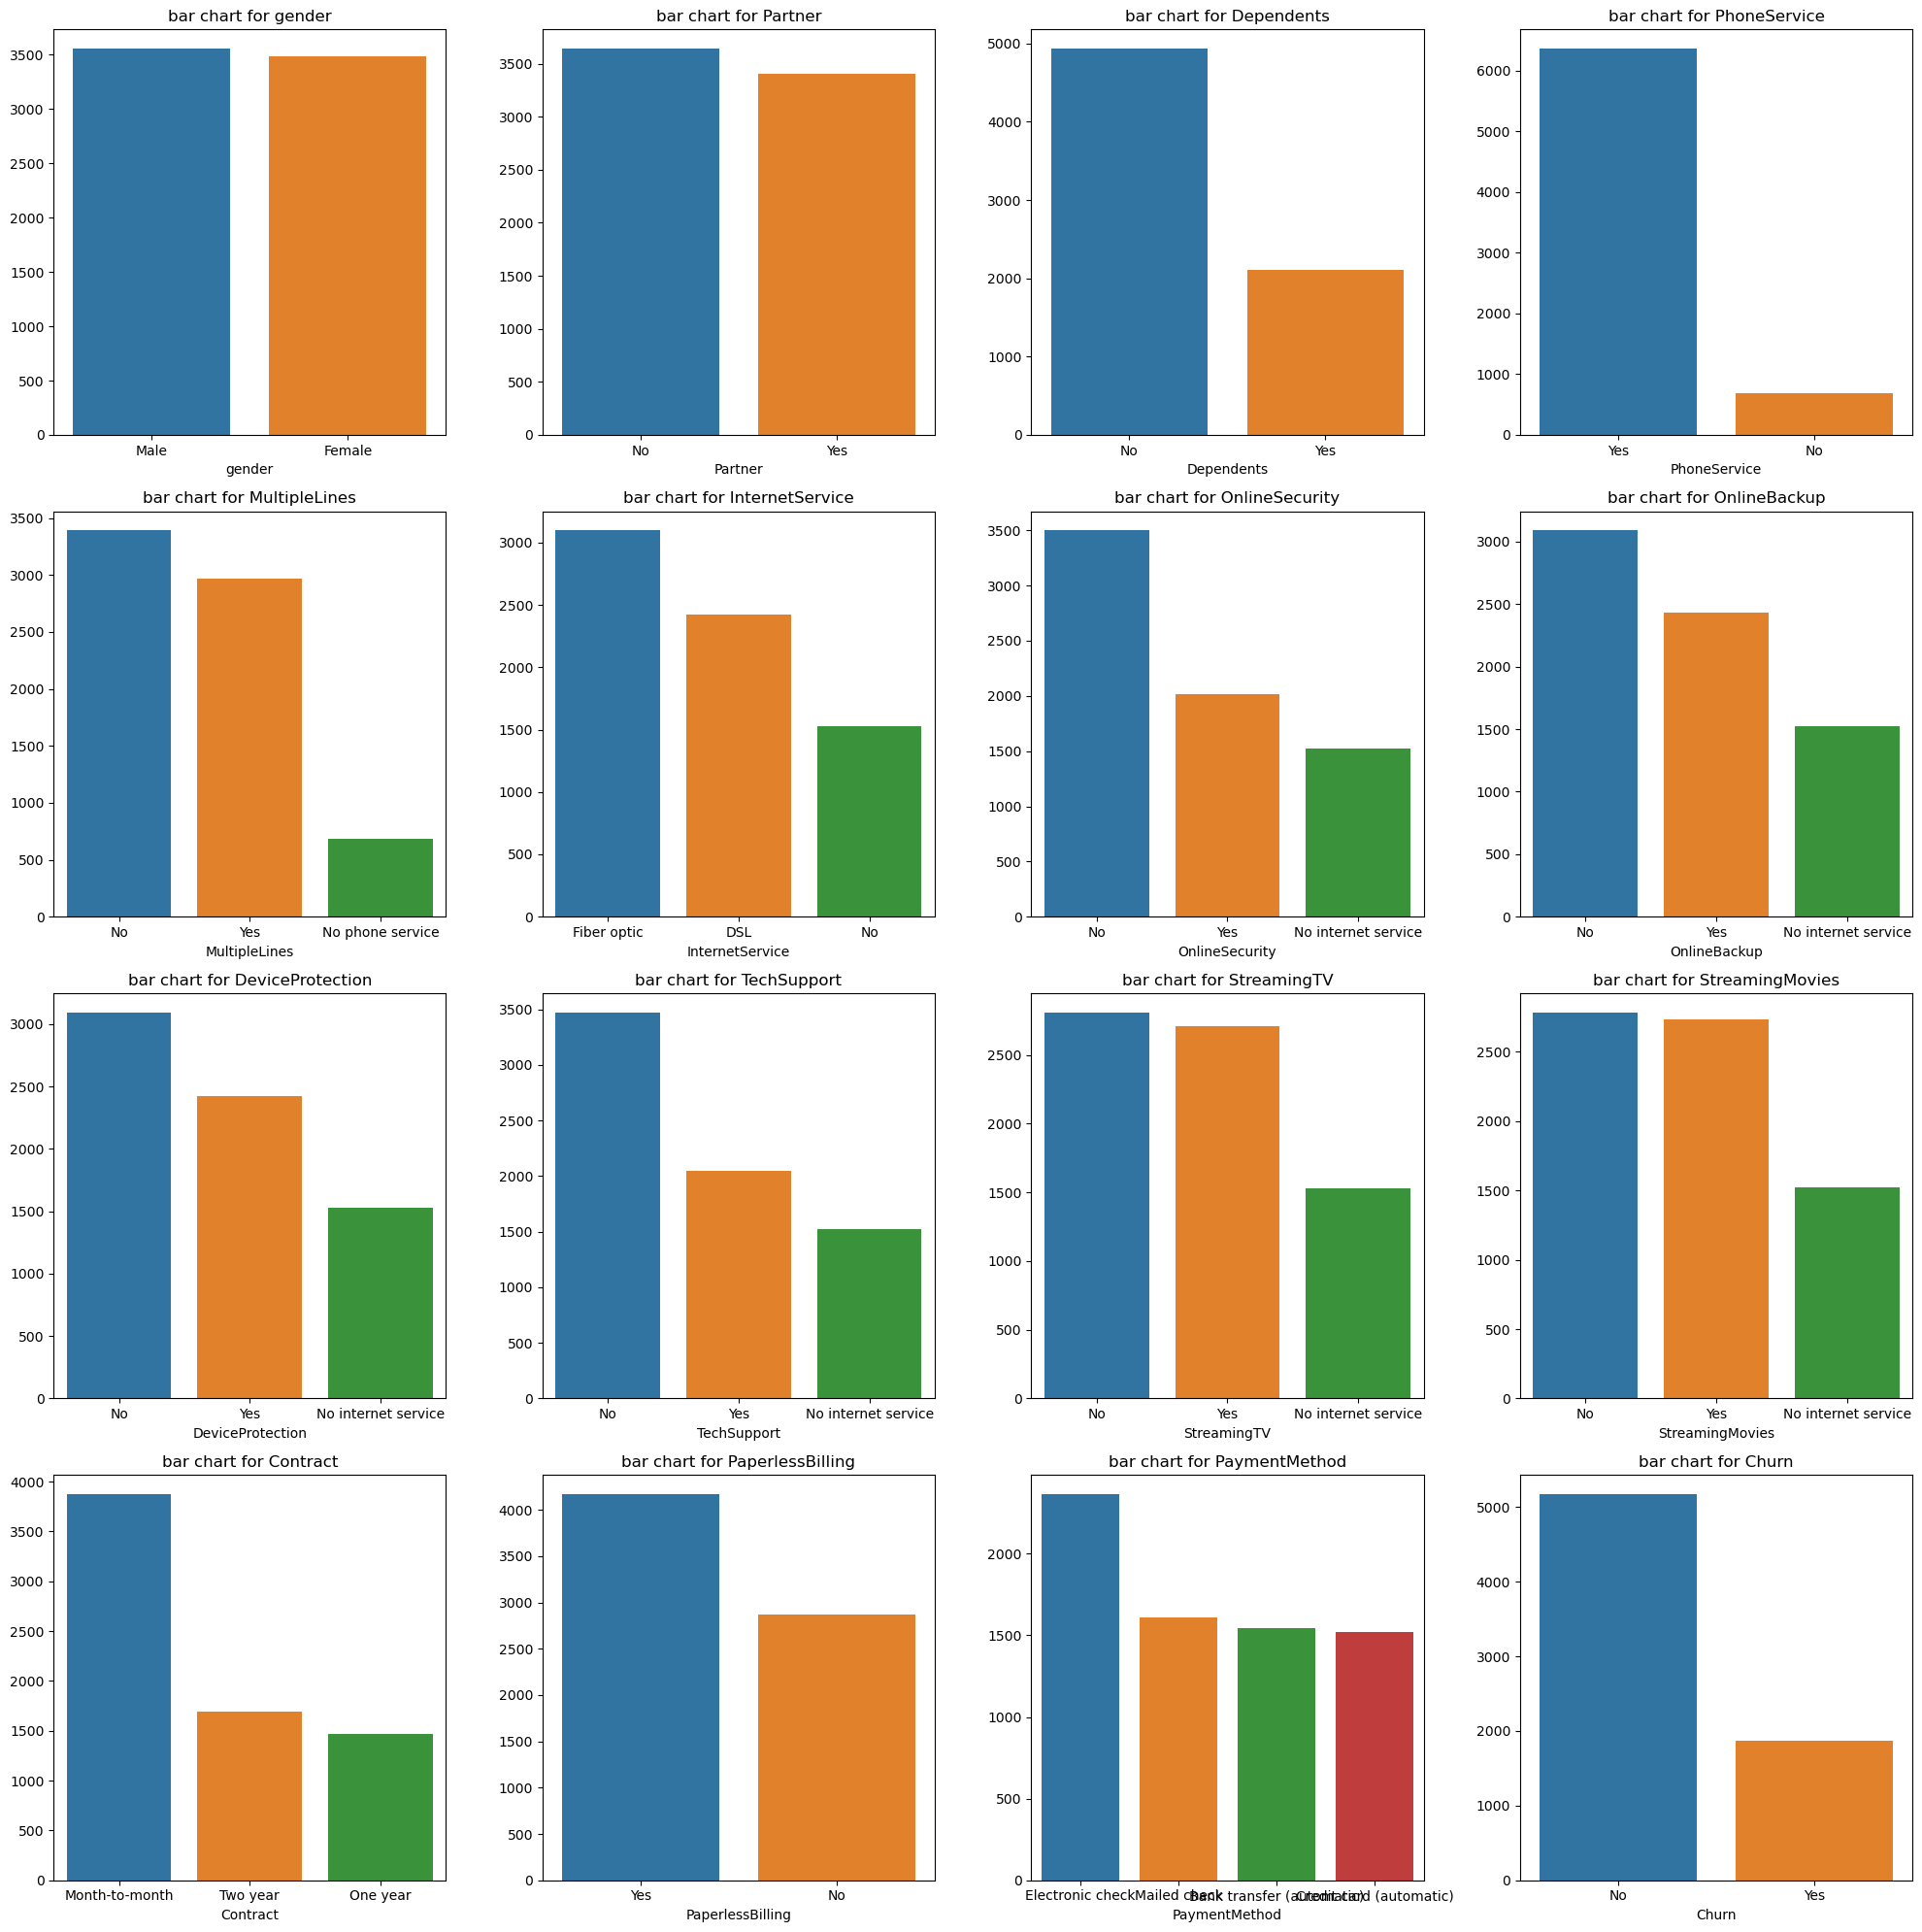

In [42]:
fig, axes = plt.subplots(nrows= 4, ncols= 4, figsize = (20,20))

position = axes.flatten()

for index, feature in enumerate(cat_columns):
    sns.barplot(x = data[feature].value_counts().index, y = data[feature].value_counts().values, ax = position[index])
    position[index].set_title(f"bar chart for {feature}")
    
plt.tight_layout()

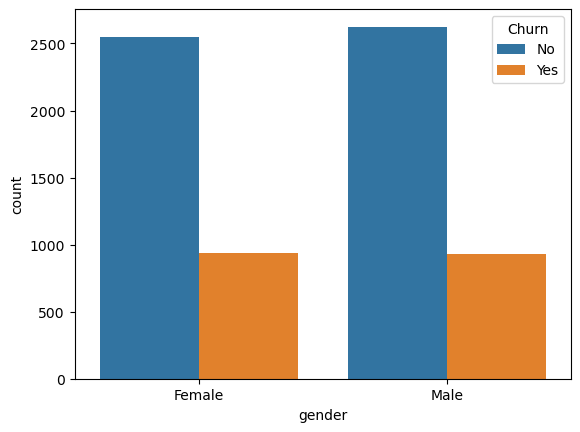

In [46]:
sns.countplot(data = categorical_df, x = "gender", hue = data["Churn"]);

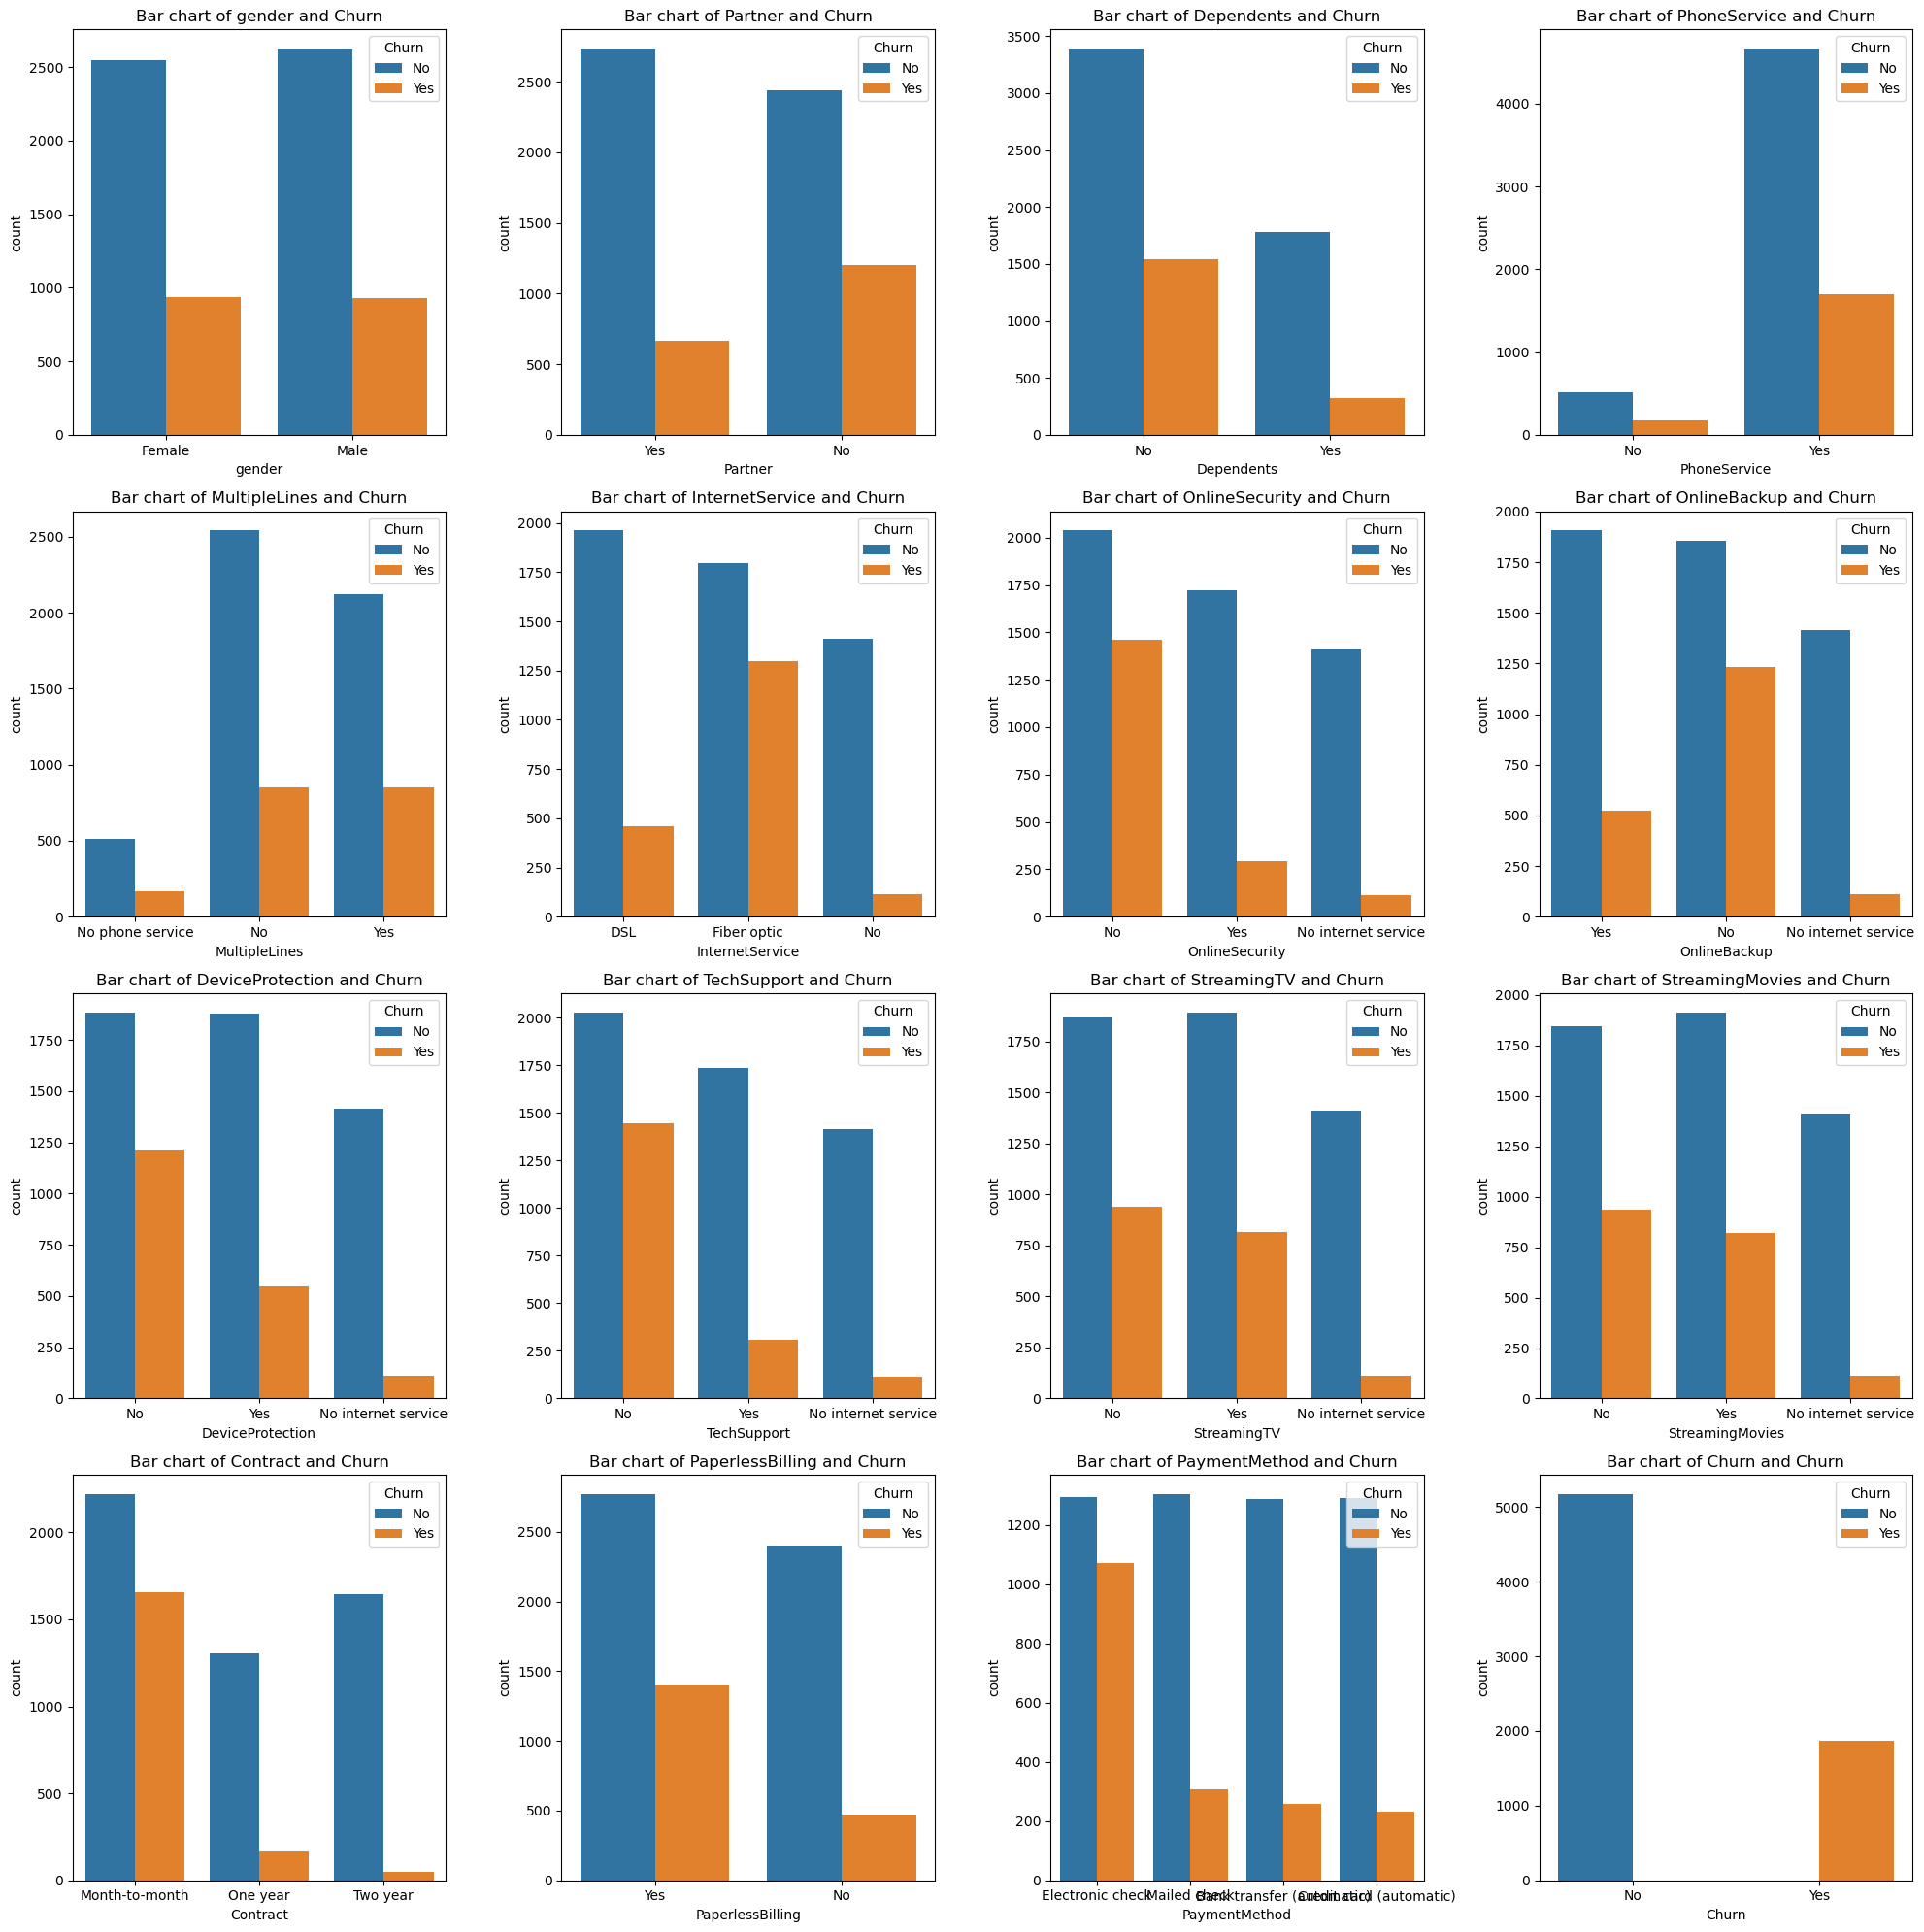

In [47]:
fig, axes = plt.subplots(nrows= 4, ncols= 4, figsize = (20,20))

position = axes.flatten()

for index, feature in enumerate(cat_columns):
    sns.countplot(data = categorical_df, x = feature, hue = data["Churn"], ax = position[index])
    position[index].set_title(f"Bar chart of {feature} and Churn")

plt.tight_layout()

In [72]:
churn_count = data["Churn"].value_counts()
churn_count

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [73]:
churn_count.index

Index(['No', 'Yes'], dtype='object', name='Churn')

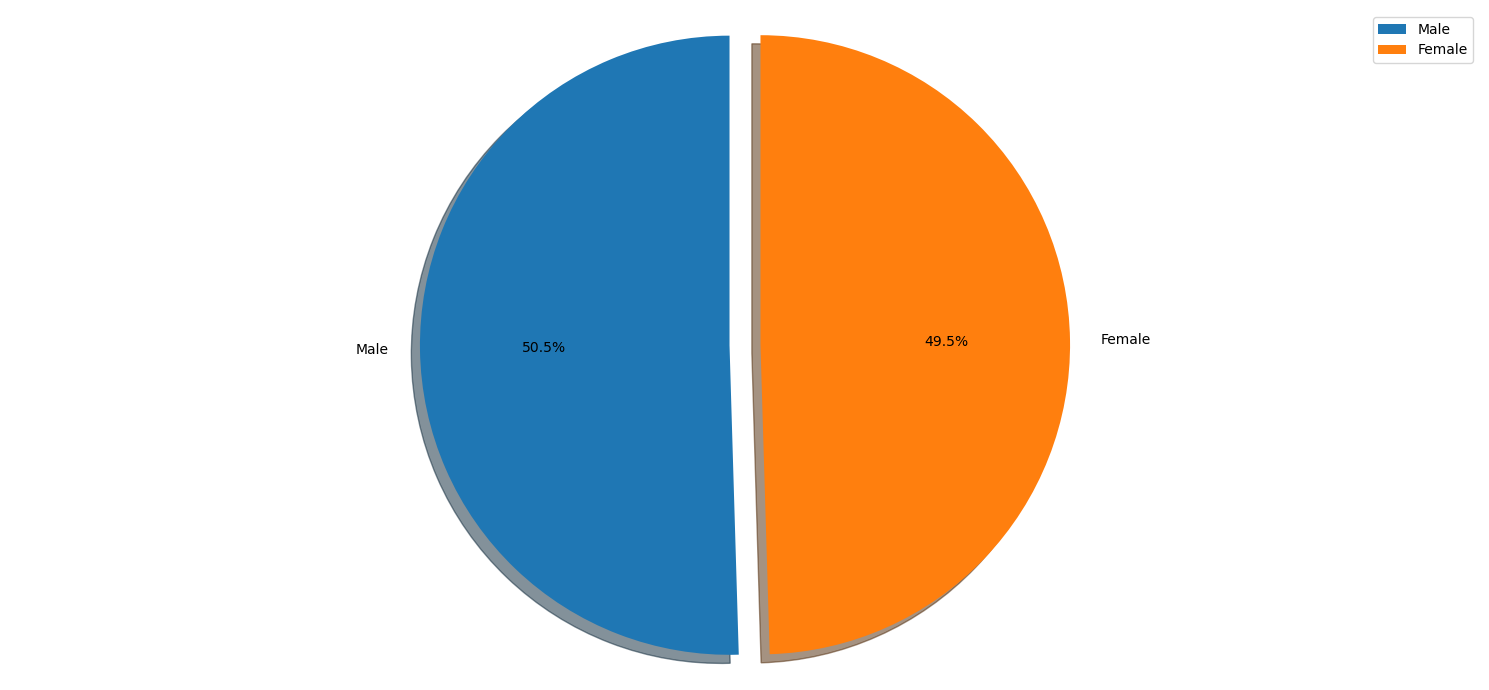

In [77]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(gender_count.values, explode=explode,labels=gender_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [48]:
len(data)

7043

In [49]:
data["Churn"].value_counts().index

Index(['No', 'Yes'], dtype='object', name='Churn')

In [50]:
data["Churn"].value_counts().values

array([5174, 1869], dtype=int64)

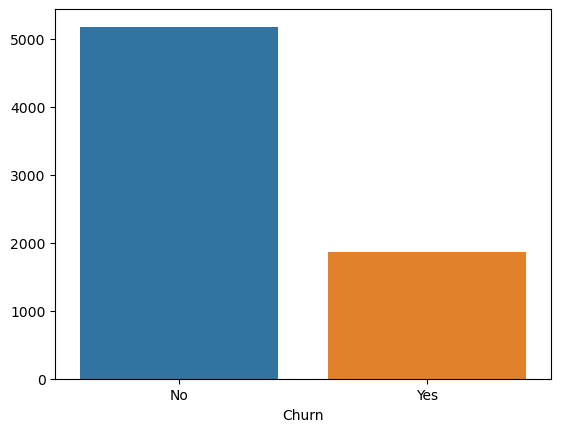

In [51]:
sns.barplot(x = data["Churn"].value_counts().index, y = data["Churn"].value_counts().values);

# Modelling (Churn Prediction)
### Data Pre-processing

In [79]:
labels = data["Churn"]
features = data.drop('Churn', axis = 1)
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [80]:
labels

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

### Encoding categorical variables
#### Using Label Encoding

In [81]:
# Select categorical columns
all_categorical_column = features.select_dtypes(include=['object'])
all_categorical_column.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [82]:
all_categorical_column["InternetService"]

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: object

In [83]:
all_categorical_column["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
#Sci-Kit learn: Science Kit learn

In [86]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [87]:
encoder.fit(all_categorical_column['InternetService'])

LabelEncoder()

In [88]:
encoder.transform(all_categorical_column['InternetService'])

array([0, 0, 0, ..., 0, 1, 1])

In [89]:
all_categorical_column['InternetService_Encoded'] = encoder.transform(all_categorical_column['InternetService'])

In [91]:
all_categorical_column[['InternetService', 'InternetService_Encoded']].value_counts()

InternetService  InternetService_Encoded
Fiber optic      1                          3096
DSL              0                          2421
No               2                          1526
Name: count, dtype: int64

In [92]:
encoder.fit(all_categorical_column['PaymentMethod'])

LabelEncoder()

In [93]:
encoder.transform(all_categorical_column['PaymentMethod'])

array([2, 3, 3, ..., 2, 3, 0])

In [95]:
all_categorical_column['PaymentMethod_Encoded'] = encoder.transform(all_categorical_column['PaymentMethod'])

In [96]:
all_categorical_column[['PaymentMethod', 'PaymentMethod_Encoded']].value_counts()

PaymentMethod              PaymentMethod_Encoded
Electronic check           2                        2365
Mailed check               3                        1612
Bank transfer (automatic)  0                        1544
Credit card (automatic)    1                        1522
Name: count, dtype: int64

#### Encoding all the categorical columns in a loop

In [97]:
for categorical_column in all_categorical_column:
    print(categorical_column)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
InternetService_Encoded
PaymentMethod_Encoded


In [99]:
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [102]:
all_categorical_column = all_categorical_column.drop(["InternetService_Encoded", "PaymentMethod_Encoded"], axis = 1)

KeyError: "['InternetService_Encoded', 'PaymentMethod_Encoded'] not found in axis"

In [103]:
all_categorical_column

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [104]:
for categorical_column in all_categorical_column:
    features[categorical_column] = encoder.fit_transform(features[categorical_column])

In [105]:
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [130]:
features.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [131]:
features[features.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,0,0,1,1,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,NaN
753,1,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,NaN
936,0,0,1,1,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,NaN
1082,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,NaN
1340,0,0,1,1,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,NaN
3331,1,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,19.85,NaN
3826,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.35,NaN
4380,0,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.00,NaN
5218,1,0,1,1,0,1,0,2,1,1,1,1,1,1,1,1,3,19.70,NaN
6670,0,0,1,1,0,1,2,0,0,2,2,2,2,0,2,0,3,73.35,NaN


In [132]:
features["TotalCharges"].median()

1397.475

In [133]:
TotalCharges_median = features["TotalCharges"].median()
TotalCharges_median

1397.475

In [134]:
features["TotalCharges"].fillna(TotalCharges_median,inplace=True)

In [135]:
features.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [136]:
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


### Data splitting and Feature scaling

In [138]:
print(f"Our data contains {len(features)} records before spliting")

Our data contains 7043 records before spliting


### Split the data into training and testing sets

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [140]:
print(f"Our train data contains {len(X_train)} records after spliting")

Our train data contains 5634 records after spliting


In [141]:
print(f"Our test data contains {len(X_test)} records after spliting")

Our test data contains 1409 records after spliting


In [142]:
len(X_train) + len(X_test) == len(features)

True

In [143]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.800
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.450
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.450
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.950
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,1397.475


In [144]:
y_train.head()

2142     No
1623     No
6074    Yes
1362    Yes
6754     No
Name: Churn, dtype: object

## Model training
#### We'll start with a logistic regression

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
# Initialize the model
model = LogisticRegression(random_state=42)

In [147]:
# Train the model
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [148]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [149]:
predictions

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [150]:
y_test.values

array(['Yes', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

### Model Evaluation

In [158]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)

In [159]:
# Display results
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Classification Report:
               precision    recall  f1-score   support

          No    0.85780   0.90251   0.87959      1036
         Yes    0.68339   0.58445   0.63006       373

    accuracy                        0.81831      1409
   macro avg    0.77059   0.74348   0.75482      1409
weighted avg    0.81163   0.81831   0.81353      1409

Confusion Matrix:
 [[935 101]
 [155 218]]


Text(50.722222222222214, 0.5, 'Prediction')

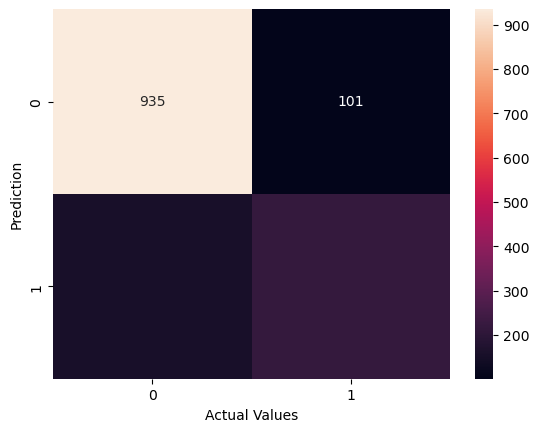

In [157]:
sns.heatmap(matrix, annot=True, fmt='.6g')
plt.xlabel("Actual Values")
plt.ylabel("Prediction")

### Now let's see how to improve the model performance

#### First lets show the importance of data scaling
If our data has a uniform distribution, we'll use Min-Max Scaler.<br>
If the distribution is normal, we'll use a Standard Scaler

In [160]:
from sklearn.preprocessing import MinMaxScaler

# Scale our training data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [161]:
# Initialize the model
model = LogisticRegression(random_state=42)

In [162]:
# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [163]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

In [164]:
# Evaluate the model
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

In [165]:
# Display results
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)
print("\n")

Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix:
 [[934 102]
 [157 216]]




<Axes: >

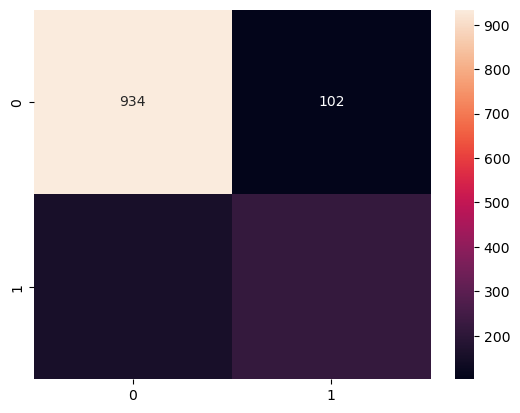

In [166]:
sns.heatmap(matrix, annot=True, fmt='.6g')

<Axes: xlabel='Churn', ylabel='count'>

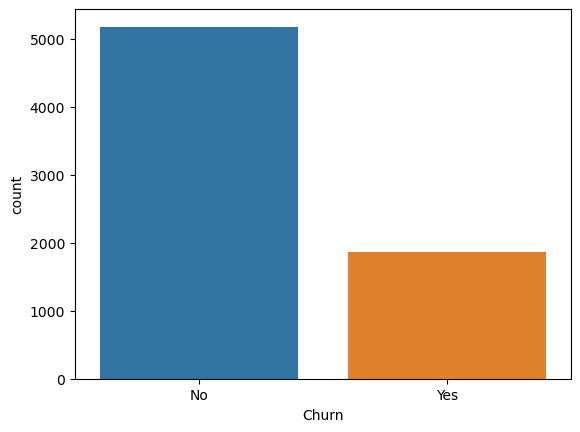

In [168]:
sns.countplot(x="Churn", data=data, )

### Improving our model
Let's inform the model of our class imbalance and manually assign some class weight/importance to our weak class (class: `Yes`) ?

Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.63      0.76      1036
         Yes       0.47      0.90      0.62       373

    accuracy                           0.70      1409
   macro avg       0.71      0.77      0.69      1409
weighted avg       0.82      0.70      0.72      1409

Confusion Matrix:
 [[654 382]
 [ 37 336]]




<Axes: >

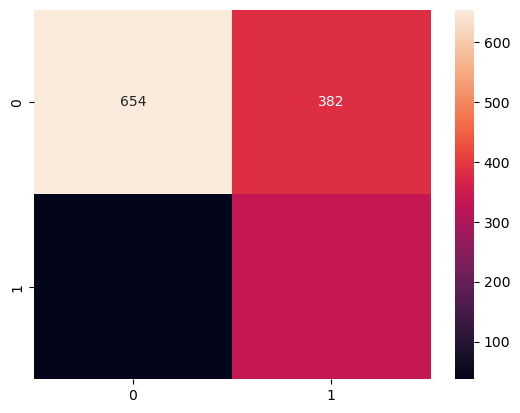

In [172]:
# Initialize the model
model = LogisticRegression(random_state=42, class_weight={"No":1, "Yes":4}) # Assuming misclassifying class 1 is 4 times more costly 
# Train the model
model.fit(X_train_scaled, y_train)
# Make predictions on the test set
predictions = model.predict(X_test_scaled)
# Evaluate the model
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

# Display results
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)
print("\n")
sns.heatmap(matrix, annot=True, fmt='.6g')

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.63      0.76      1036
         Yes       0.47      0.90      0.62       373

    accuracy                           0.70      1409
   macro avg       0.71      0.77      0.69      1409
weighted avg       0.82      0.70      0.72      1409



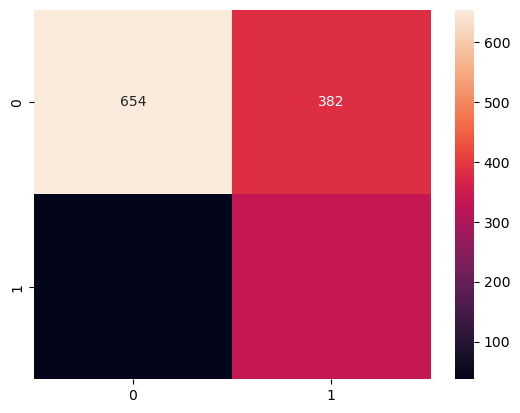

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

          No       0.97      0.49      0.65      1036
         Yes       0.40      0.95      0.56       373

    accuracy                           0.61      1409
   macro avg       0.68      0.72      0.61      1409
weighted avg       0.82      0.61      0.63      1409



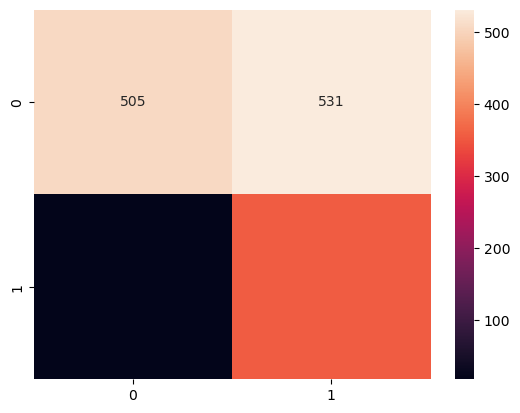

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

          No       0.81      0.82      0.81      1036
         Yes       0.48      0.47      0.48       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.72      0.73      0.72      1409



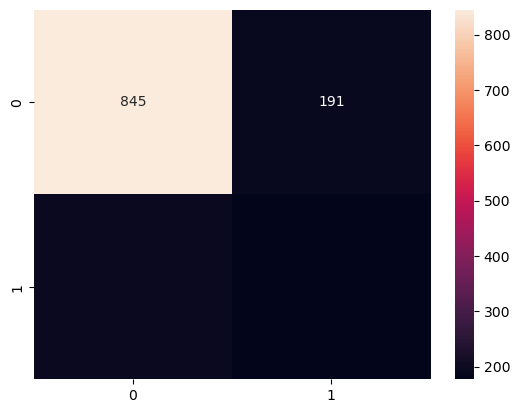

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.92      0.87      1036
         Yes       0.67      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409



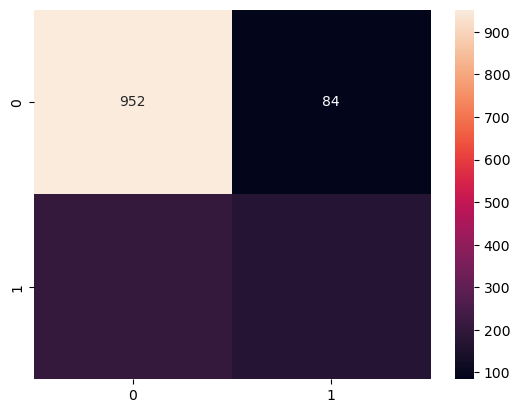

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# !pip install xgboost
from xgboost import XGBClassifier

class_weights = {"No": 1, "Yes": 4} 

# Initialize and train the models
classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
               [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
               [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
               [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
              ]

for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model_name = classifier[1]
    model = classifier[0]
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

In [176]:
features.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50


#### Feature Importance and Feature Selection

In [178]:
classifiers[2][0]

DecisionTreeClassifier(class_weight={'No': 1, 'Yes': 4}, random_state=42)

In [179]:
# Feature importance using Random Forest
importances = classifiers[2][0].feature_importances_
importances

array([0.02013951, 0.01502001, 0.0130532 , 0.02086802, 0.10323234,
       0.00315464, 0.016554  , 0.01485786, 0.03637689, 0.0162659 ,
       0.01020801, 0.01546009, 0.0051338 , 0.01545087, 0.24430196,
       0.01961191, 0.04919489, 0.19361798, 0.1874981 ])

In [180]:
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

,Feature,Importance
0,gender,0.020140
1,SeniorCitizen,0.015020
2,Partner,0.013053
3,Dependents,0.020868
4,tenure,0.103232
5,PhoneService,0.003155
6,MultipleLines,0.016554
7,InternetService,0.014858
8,OnlineSecurity,0.036377
9,OnlineBackup,0.016266


In [181]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
14,Contract,0.244302
17,MonthlyCharges,0.193618
18,TotalCharges,0.187498
4,tenure,0.103232
16,PaymentMethod,0.049195
8,OnlineSecurity,0.036377
3,Dependents,0.020868
0,gender,0.020140
15,PaperlessBilling,0.019612
6,MultipleLines,0.016554


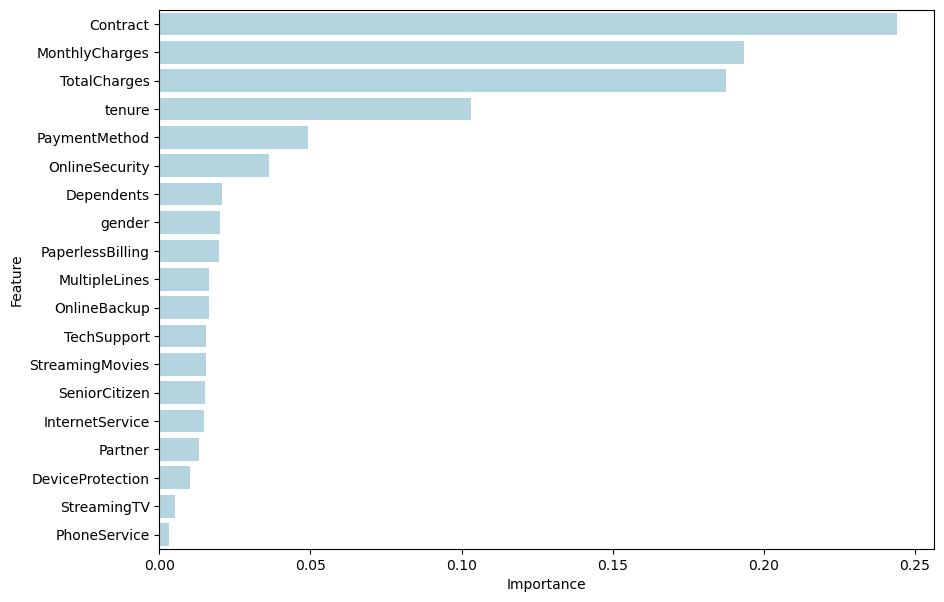

In [183]:
plt.figure(figsize=(10, 7))

sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='lightblue');

In [184]:
selected_features = feature_importance_df[:5]
selected_features

,Feature,Importance
14,Contract,0.244302
17,MonthlyCharges,0.193618
18,TotalCharges,0.187498
4,tenure,0.103232
16,PaymentMethod,0.049195


In [185]:
X_train[selected_features['Feature'].values]

,Contract,MonthlyCharges,TotalCharges,tenure,PaymentMethod
2142,1,64.85,1336.800,21,3
1623,2,97.20,5129.450,54,0
6074,0,23.45,23.450,1,2
1362,0,70.20,237.950,4,2
6754,2,61.90,1397.475,0,0
...,...,...,...,...,...
3772,0,95.00,95.000,1,2
5191,2,91.10,2198.300,23,1
5226,0,21.15,306.050,12,2
5390,0,99.45,1200.150,12,2


In [186]:
Xtrain_top_five = X_train[selected_features['Feature'].values]
Xtest_top_five = X_test[selected_features['Feature'].values]

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.59      0.73      1036
         Yes       0.45      0.92      0.60       373

    accuracy                           0.68      1409
   macro avg       0.70      0.76      0.67      1409
weighted avg       0.82      0.68      0.70      1409



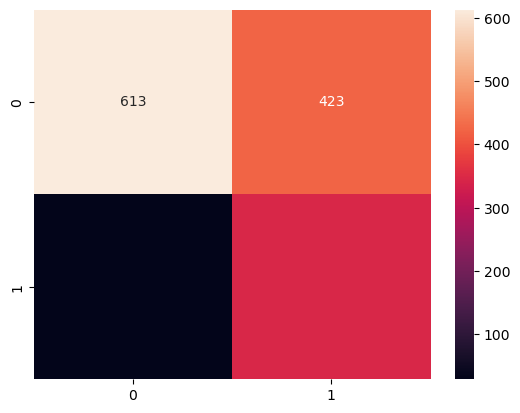

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.89      0.85      1036
         Yes       0.59      0.46      0.52       373

    accuracy                           0.77      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



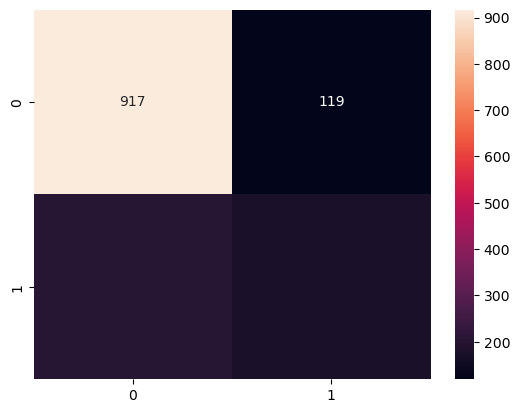

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.81      0.82      1036
         Yes       0.50      0.54      0.52       373

    accuracy                           0.74      1409
   macro avg       0.67      0.68      0.67      1409
weighted avg       0.74      0.74      0.74      1409



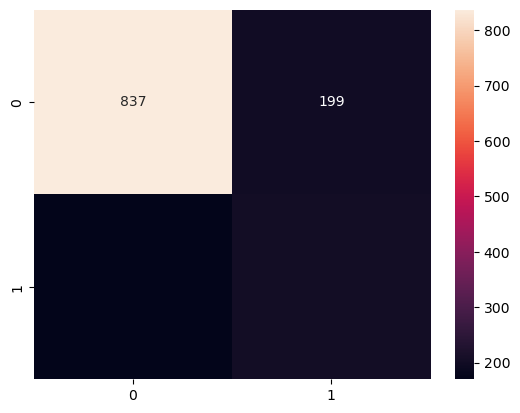

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.88      0.85      1036
         Yes       0.60      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



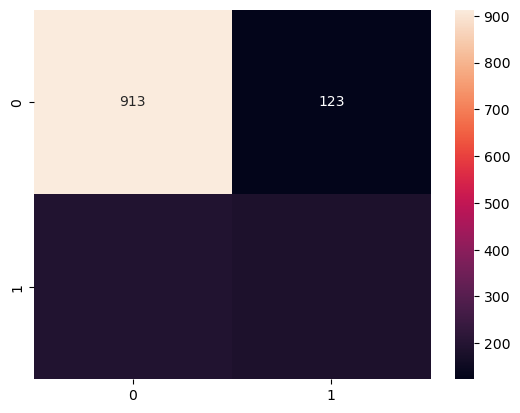

In [188]:
for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model_name = classifier[1]
    model = classifier[0]
    model.fit(Xtrain_top_five, y_train)
    predictions = model.predict(Xtest_top_five)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show();

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define a custom scorer that specifies the positive label
f1_scorer = make_scorer(f1_score, pos_label='Yes')

# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [None, 20, 30, 50],
    'min_samples_split': [ 5, 7, 10],
    'class_weight': [{"No":1, "Yes":2}, {"No":1, "Yes":3}, {"No":1, "Yes":4}]
}

grid_search = GridSearchCV(estimator=classifier[0][0], param_grid=param_grid, cv=5, scoring=f1_scorer)
grid_search.fit(X_train_scaled, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

Best Parameters: {'class_weight': {'No': 1, 'Yes': 2}, 'max_depth': 20, 'min_samples_split': 10}
Best Score: 0.56


In [200]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight={'No': 1, 'Yes': 2}, max_depth=20,
                       max_features='sqrt', min_samples_split=10,
                       random_state=1608637542)

In [201]:
best_params = grid_search.best_params_

### Best Decision Tree Model ###
Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.80      0.83      1036
         Yes       0.53      0.63      0.58       373

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.70      1409
weighted avg       0.77      0.76      0.76      1409



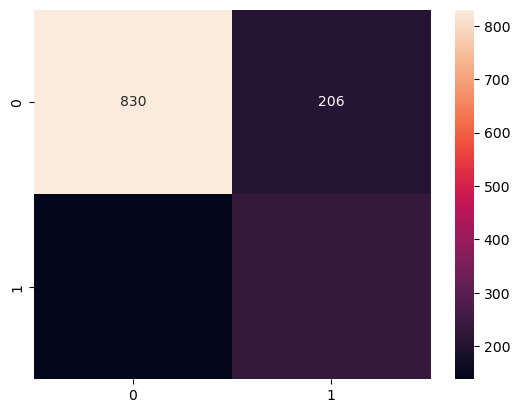

In [202]:
# Evaluate the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

# Display results
print("### Best Decision Tree Model ###")
print("Classification Report:\n", report)
sns.heatmap(matrix, annot=True, fmt='g')
plt.show()

## Narration and Observation

### Model Analysis
This output provides a detailed performance analysis of a Decision Tree model using classification metrics and a confusion matrix.

#### **Classification Report:**
- #### **Precision:**
- **No:** 0.86: Out of all the instances predicted as "No," 86% were correctly identified.
- **Yes:** 0.53: Out of all the instances predicted as "Yes," 53% were correctly identified.
- #### **Recall:**
- **No:** 0.80: Out of all the actual "No" instances, 80% were correctly identified.
- **Yes:** 0.63: Out of all the actual "Yes" instances, 63% were correctly identified.
- #### **F1-Score:**
- **No:** 0.83: This is the harmonic mean of precision and recall, indicating a strong balance between the two for "No."
- **Yes:** 0.58: This lower score reflects the difficulty in correctly classifying "Yes" instances.
- #### **Support:**
- The number of actual occurrences for each class in the test set.
- **No:** 1036
- **Yes:** 373
- #### **Accuracy:** 0.76: The model correctly predicted 76% of the total instances.
- #### **Macro Avg:**
- **Precision:** 0.70: The unweighted mean of the precision for both classes.
- **Recall:** 0.72: The unweighted mean of the recall for both classes.
- **F1-Score:** 0.70: The unweighted mean of the F1 scores for both classes.
- #### **Weighted Avg:**
- **Precision:** 0.77
- **Recall:** 0.76
- **F1-Score:** 0.76
- These averages take into account the support of each class, making them more reflective of the dataset's imbalance.
#### **Confusion Matrix:**
- **Top-left (True Negative, TN):** 830 instances were correctly classified as "No."
- **Top-right (False Positive, FP):** 206 instances were incorrectly classified as "Yes" when they were actually "No."
- **Bottom-left (False Negative, FN):** 137 instances were incorrectly classified as "No" when they were actually "Yes."
- **Bottom-right (True Positive, TP):** 236 instances were correctly classified as "Yes."

### **Interpretation:**
- **Strengths:**
- The model performs well in identifying "No" cases, with high precision (0.86) and a solid F1 score (0.83).
- The overall accuracy is decent at 76%, which is a good indicator of the model's performance on this dataset.
- **Weaknesses:**
- The model struggles with identifying "Yes" cases, as reflected by the lower precision (0.53) and F1 score (0.58). This suggests that while the model can correctly identify most "No" cases, it has difficulty correctly identifying "Yes" cases, resulting in a higher number of false positives and false negatives.
- The relatively high number of false positives (206) suggests that the model sometimes incorrectly classifies "No" instances as "Yes," which might be a concern depending on the application.

### **Conclusion:**
This Decision Tree model is considered the "best" among other models likely because it provides a good trade-off between precision and recall for the "No" class, and its overall accuracy is reasonable. However, improvements could be made to better handle the "Yes" class, such as tuning hyperparameters further, using a different algorithm, or applying techniques like resampling to address class imbalance.